In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
ins=pd.read_csv("insurance.csv")
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
ins.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
ins.shape

(1338, 7)

In [5]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
ins["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [7]:
cont=ins[["age","bmi","children","charges"]]
cat=ins[["sex","smoker","region"]]

In [8]:
ins1=pd.get_dummies(ins,list(cat.columns))
ins1.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [9]:
ins1.shape

(1338, 12)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.feature_selection import f_regression

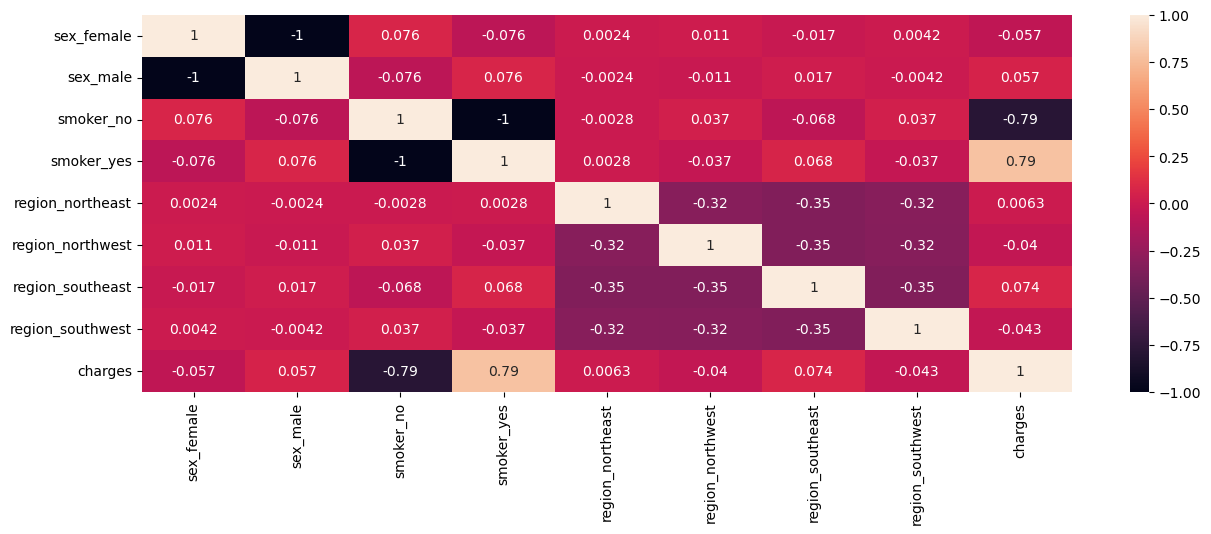

In [11]:
plt.figure(figsize=(15,5),dpi=100)
sns.heatmap(ins1[["sex_female","sex_male","smoker_no","smoker_yes","region_northeast","region_northwest","region_southeast","region_southwest","charges"]].corr(),annot=True)
plt.show()

In [12]:
ins1

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


<AxesSubplot:>

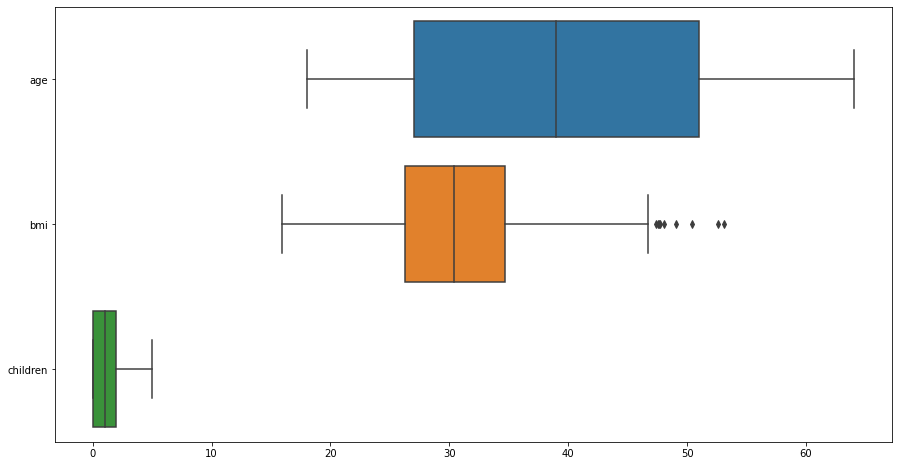

In [13]:
plt.figure(figsize=(15,8))
sns.boxplot(data=ins1[["age","bmi","children"]],orient='h')

<AxesSubplot:>

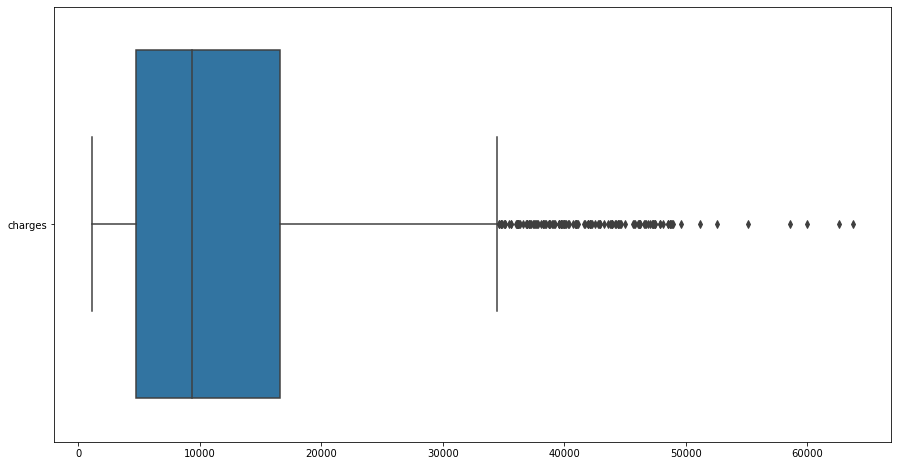

In [14]:
plt.figure(figsize=(15,8))
sns.boxplot(data=ins1[["charges"]],orient='h')

In [15]:
quantile1,quantile3=np.percentile(ins1["bmi"],(25,75))
iqr=quantile3-quantile1
iqr
upperbound=quantile3+(1.5*iqr)
lowerbound=quantile1-(1.5*iqr)
print(upperbound,lowerbound)

47.290000000000006 13.7


In [17]:
for i in range(1,len(ins1["bmi"])):
    if ins1["bmi"][i]>upperbound:
        ins1["bmi"][i]=upperbound
    elif ins1["bmi"][i]<lowerbound:
        ins1["bmi"][i]=lowerbound

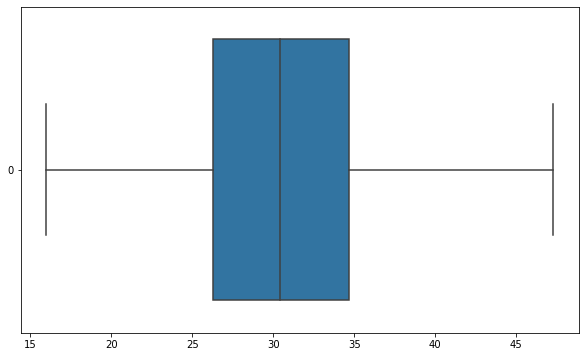

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(data=ins1["bmi"],orient="h")
plt.show()

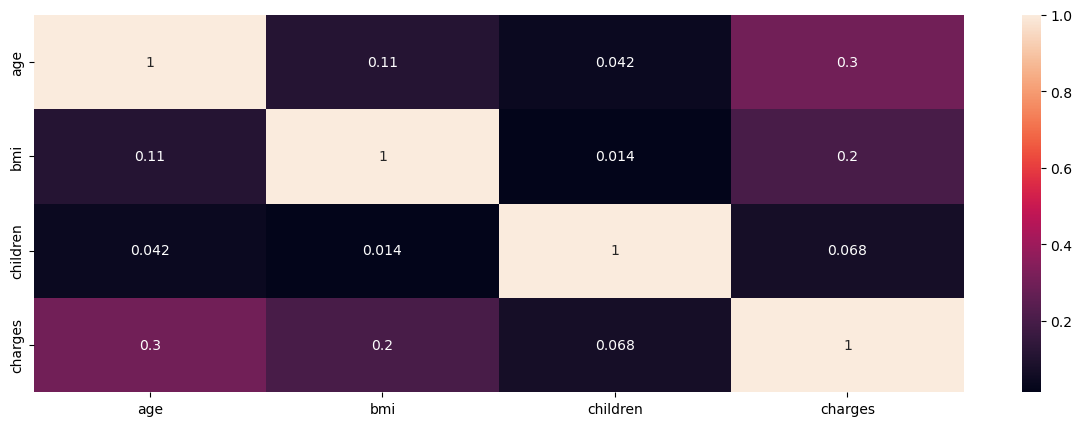

In [19]:
plt.figure(figsize=(15,5),dpi=100)
sns.heatmap(ins1[["age","bmi","children","charges"]].corr(),annot=True)
plt.show()

In [20]:
linreg=LinearRegression()
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=1000,random_state=0)

In [109]:
from sklearn.model_selection import train_test_split
x_new=ins1[["age","bmi","children","sex_male","smoker_yes","region_northeast","region_southwest"]]
y_new=ins1[["charges"]]
xn_train,xn_test,yn_train,yn_test=train_test_split(x_new,y_new,test_size=0.2,random_state=362)
linreg.fit(xn_train,yn_train)

LinearRegression()

In [110]:
ans=linreg.predict(xn_test)

In [111]:
round(metrics.r2_score(yn_test.values,ans),2)

0.79

In [112]:
metrics.mean_absolute_error(yn_test,ans)

4227.049814355431

In [113]:
np.sqrt(metrics.mean_squared_error(yn_test,ans))

5932.373374213523

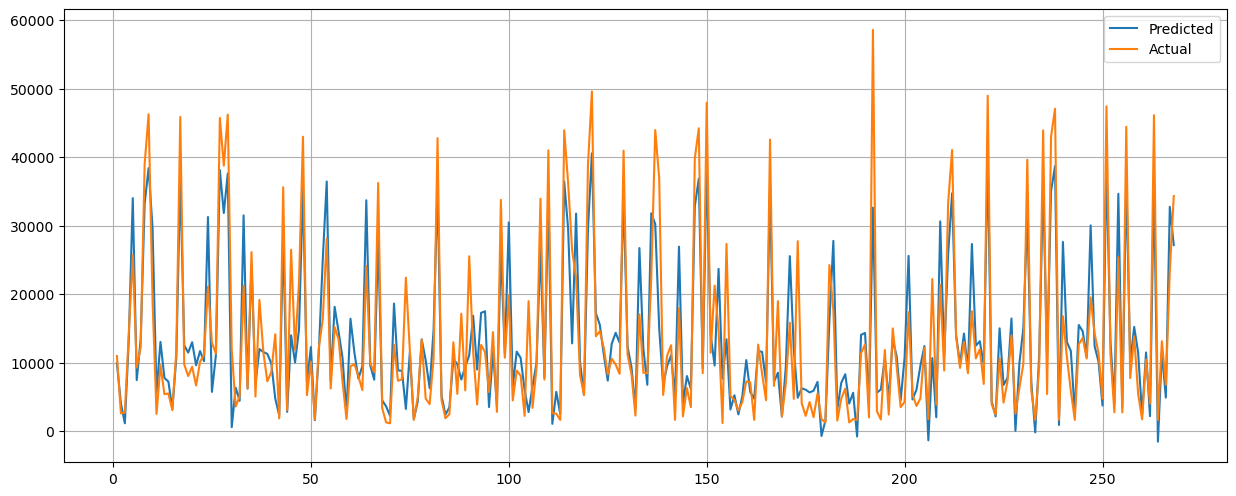

In [114]:
plt.figure(figsize=(15,6),dpi=100)
plt.plot(range(1,len(ans)+1),ans,label="Predicted")
plt.plot(np.arange(1,len(ans)+1),yn_test.values,label="Actual")
plt.legend()
plt.grid("True")
plt.show()

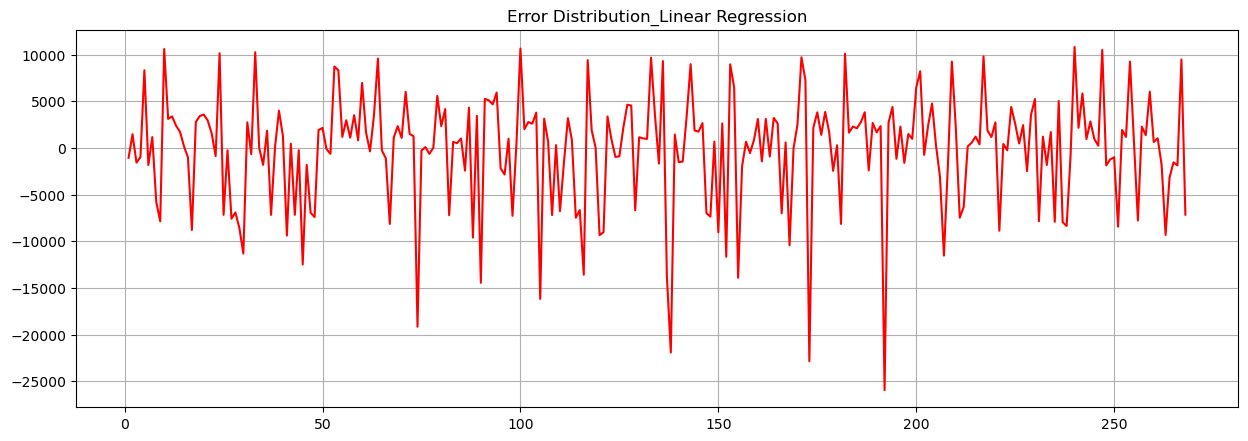

In [115]:
err=ans-yn_test
plt.figure(figsize=(15,5),dpi=100)
plt.title("Error Distribution_Linear Regression")
plt.plot(range(1,len(ans)+1),err.values,c="r")
plt.grid("True")
plt.show()

# Random Forest

In [116]:
rf.fit(xn_train,yn_train.values.ravel())
yrf=rf.predict(xn_test)
round(metrics.r2_score(yn_test.values,yrf),2)

0.87

In [117]:
metrics.mean_absolute_error(yn_test,yrf)

2570.5766398434553

In [118]:
np.sqrt(metrics.mean_squared_error(yn_test.values,yrf))

4674.806371145091

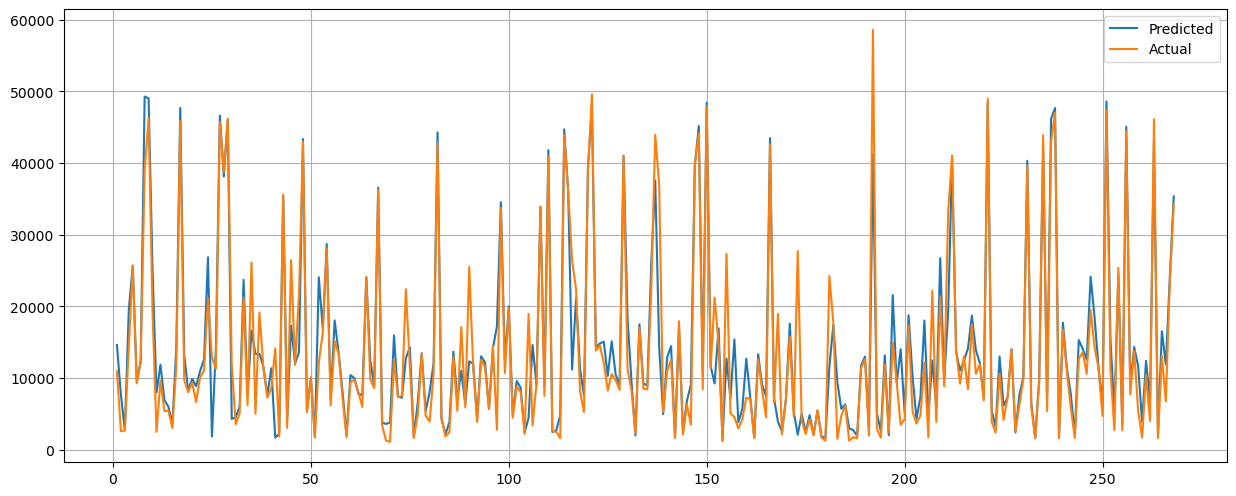

In [119]:
plt.figure(figsize=(15,6),dpi=100)
plt.plot(range(1,len(ans)+1),yrf,label="Predicted")
plt.plot(np.arange(1,len(ans)+1),yn_test.values,label="Actual")
plt.legend()
plt.grid("True")
plt.show()

In [120]:
yrf_e=yrf-yn_test["charges"]

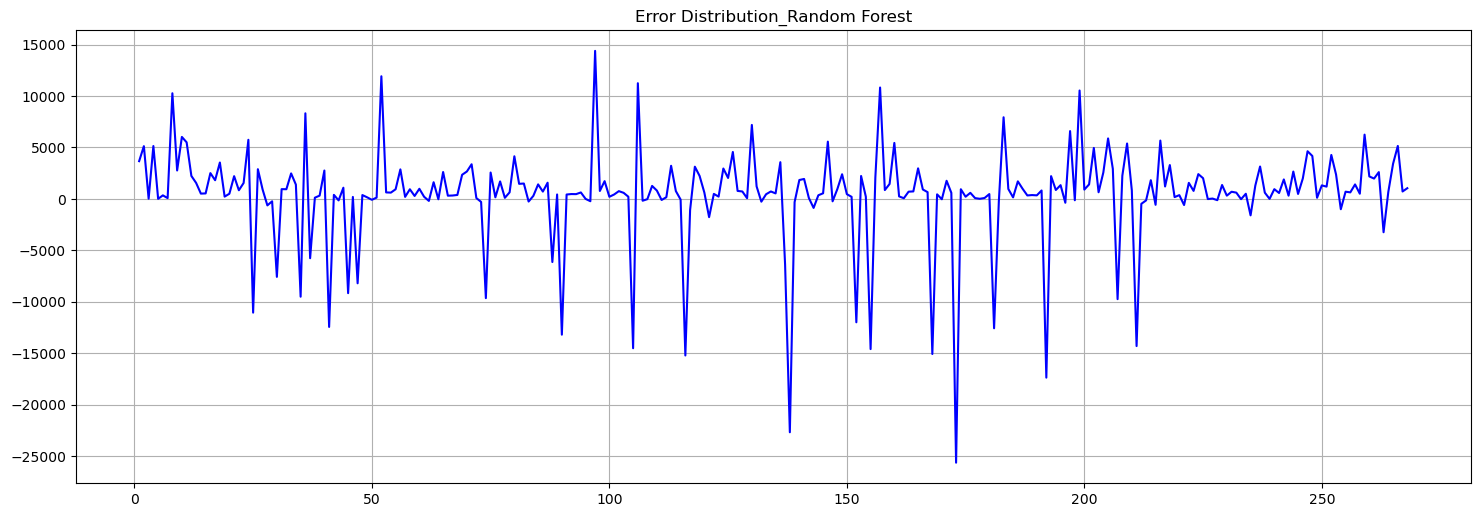

In [121]:
plt.figure(figsize=(18,6),dpi=100)
plt.title("Error Distribution_Random Forest")
plt.plot(range(1,len(yrf_e)+1),yrf_e,c="b")
plt.grid("True")
plt.show()

# Polynomial 

In [122]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
x_new=poly.fit_transform(x_new)
xn_train,xn_test,yn_train,yn_test=train_test_split(x_new,y_new,test_size=0.2,random_state=362)

In [123]:
linreg.fit(xn_train,yn_train)

LinearRegression()

In [124]:
ans=linreg.predict(xn_test)
round(metrics.r2_score(yn_test,ans),2)

0.88

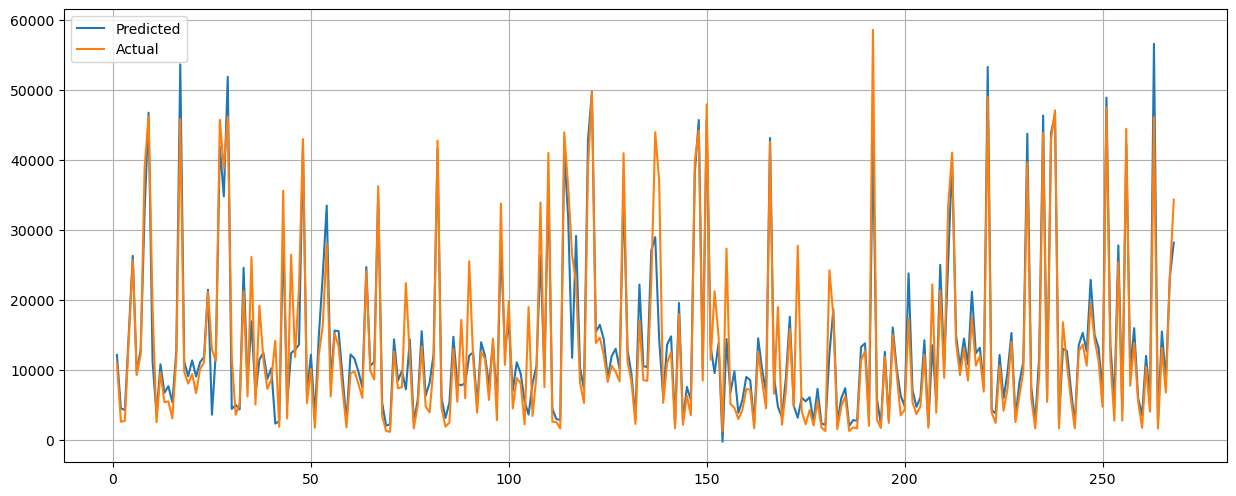

In [125]:
plt.figure(figsize=(15,6),dpi=100)
plt.plot(range(1,len(ans)+1),ans,label="Predicted")
plt.plot(np.arange(1,len(ans)+1),yn_test.values,label="Actual")
plt.legend()
plt.grid("True")
plt.show()

In [126]:
metrics.mean_absolute_error(yn_test,ans)

2858.0135057486004

In [127]:
np.sqrt(metrics.mean_squared_error(yn_test,ans))

4552.466760673157

In [128]:
error=ans-yn_test

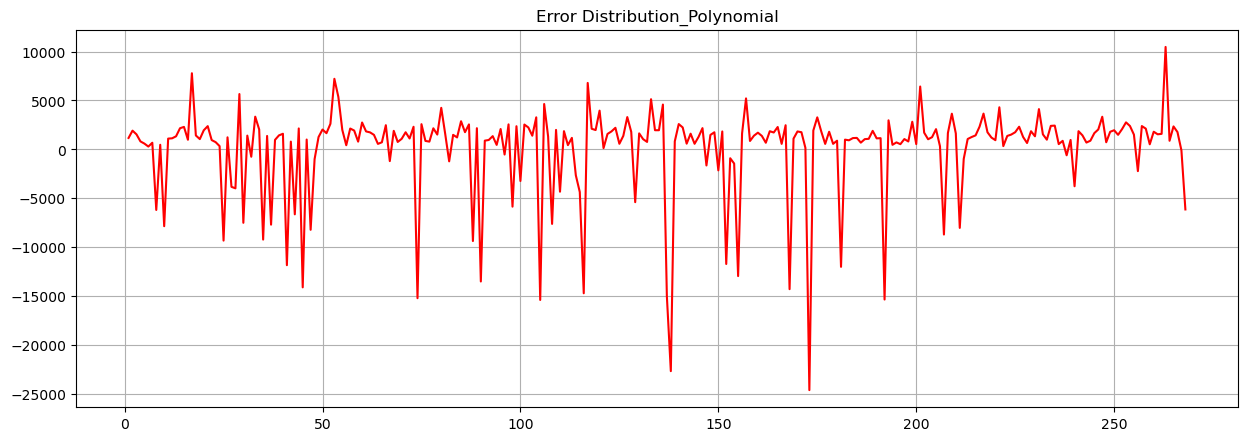

In [129]:
plt.figure(figsize=(15,5),dpi=100)
plt.title("Error Distribution_Polynomial")
plt.plot(range(1,len(ans)+1),error.values,c="r")
plt.grid("True")
plt.show()